### Importing the libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Loading the dataset

In [35]:
df=pd.read_csv('Iris.csv')

In [36]:
num_rows,num_cols=df.shape
print("The total no of rows in the dataset=",num_rows)
print("The total no of columns in the dataset=",num_cols)

The total no of rows in the dataset= 150
The total no of columns in the dataset= 6


In [37]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### We can see that the dataset has actually 150 rows of observations on 5 diffrent variables(The first column actually denotes the id) namely   
- Sepal length  
- Sepal width  
- Petal-length  
- Petal-width  
- Species.

In [38]:
#Finding out no of non-null values and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Description of the dataset

In [39]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

### Histogram of 4 numerical variables

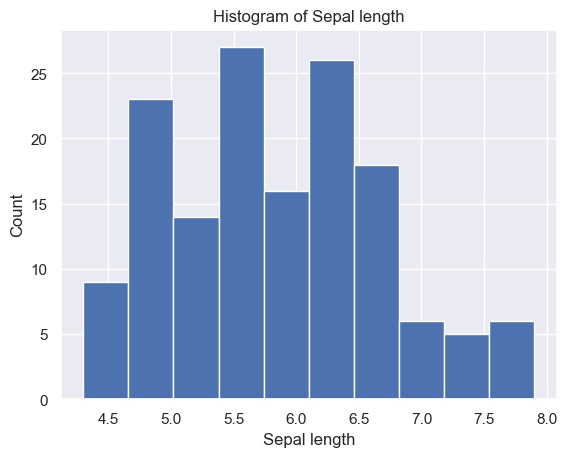

In [40]:
#Histogram of Sepal length
sepal_length=df["SepalLengthCm"]
plt.hist(sepal_length,bins=10)
plt.title("Histogram of Sepal length")
plt.xlabel("Sepal length")
plt.ylabel("Count")
plt.show()

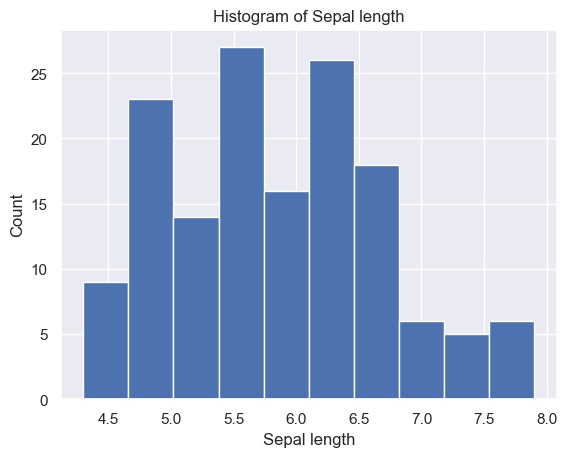

In [41]:
#Histogram of sepal length using seaborn
sns.set()
plt.hist(sepal_length,bins=10)
plt.title("Histogram of Sepal length")
plt.xlabel("Sepal length")
plt.ylabel("Count")
plt.show()


C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_8804\621389292.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(gs[0])


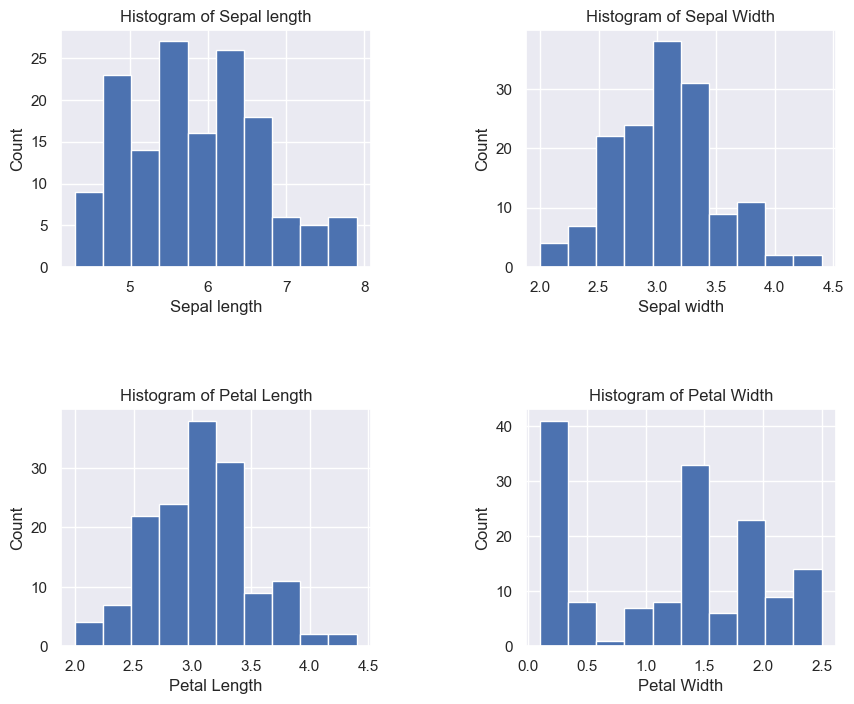

<module 'matplotlib.pyplot' from 'd:\\project\\Codsoft\\Iris classification\\iris_env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [42]:
plt.subplots(figsize=(10,8))
gs = gridspec.GridSpec(2, 2, width_ratios=[5,5],wspace=0.5,height_ratios=[5,5],hspace=0.6)
plt.subplot(gs[0])
sns.set()
plt.hist(sepal_length,bins=10)
plt.title("Histogram of Sepal length")
plt.xlabel("Sepal length")
plt.ylabel("Count")

plt.subplot(gs[1])
sepal_width=df["SepalWidthCm"]
plt.hist(sepal_width,bins=10)
plt.title("Histogram of Sepal Width")
plt.xlabel("Sepal width")
plt.ylabel("Count")


plt.subplot(gs[2])
petal_length=df["PetalLengthCm"]
plt.hist(sepal_width,bins=10)
plt.title("Histogram of Petal Length")
plt.xlabel("Petal Length")
plt.ylabel("Count")

plt.subplot(gs[3])

petal_width=df["PetalWidthCm"]
plt.hist(petal_width,bins=10)
plt.title("Histogram of Petal Width")
plt.xlabel("Petal Width")
plt.ylabel("Count")
plt.subplots_adjust(wspace=0.5)


plt.show()
plt


### pie-chart of species

In [43]:
species=df["Species"]
counts=len(species.unique())
print("The no of distinct species=",counts)
print("Table of no of species count")
value_counts = df["Species"].value_counts()
print(value_counts)


The no of distinct species= 3
Table of no of species count
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


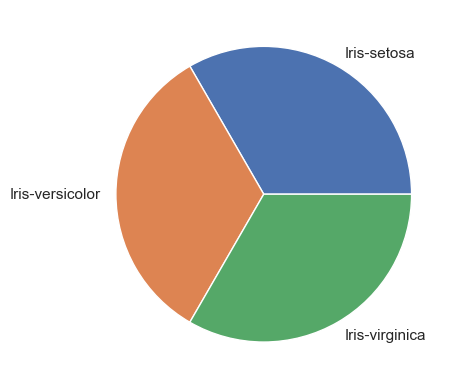

In [44]:
vector = []
for object, count in value_counts.items():
  vector.append(count)
s=species.unique()
print(s)
plt.pie(vector,labels=s,autopct="")
plt.show()

### Box Plot

Text(0.5, 1.0, 'Boxplot of Sepal Length')

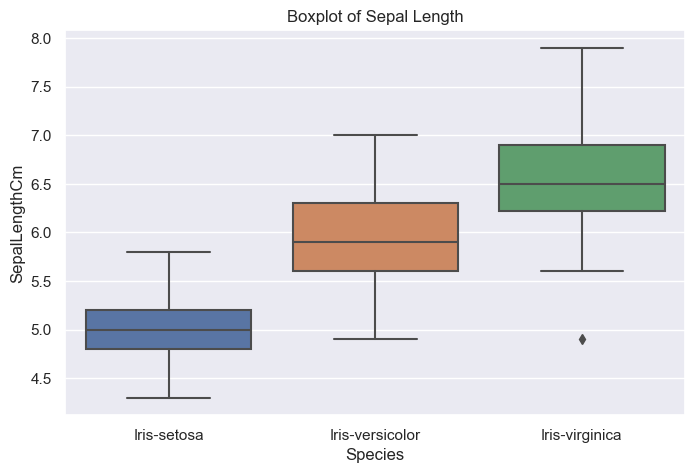

In [45]:
plt.figure(figsize=[8,5])
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.title("Boxplot of Sepal Length")


Text(0.5, 1.0, 'Boxplot of Petal Width')

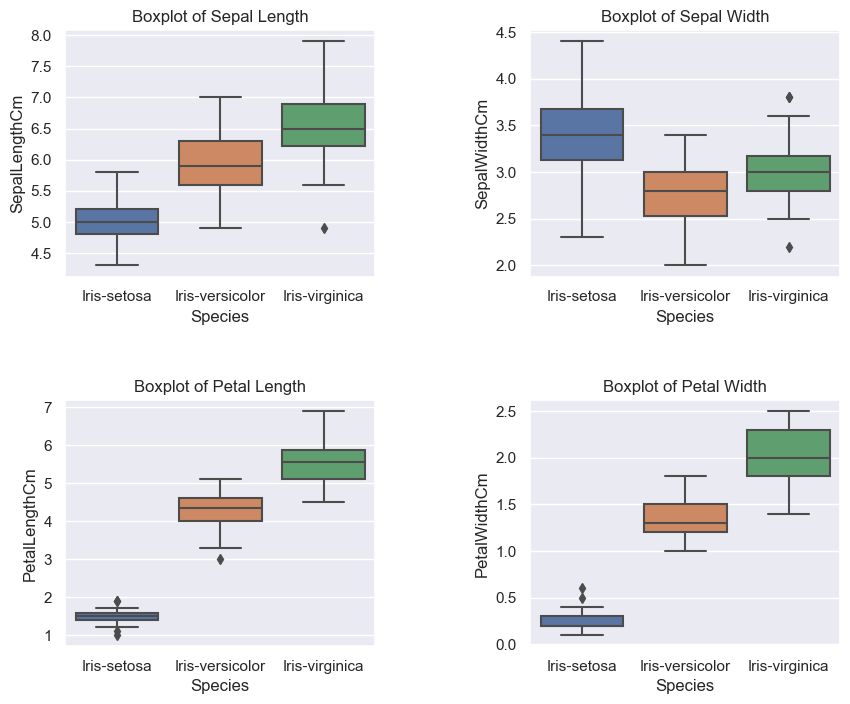

In [46]:
plt.figure(figsize=(10,8))
gs=gridspec.GridSpec(2,2,wspace=0.5,hspace=0.5)
plt.subplot(gs[0])
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.title("Boxplot of Sepal Length")

plt.subplot(gs[1])
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.title("Boxplot of Sepal Width")

plt.subplot(gs[2])
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.title("Boxplot of Petal Length")

plt.subplot(gs[3])
sns.boxplot(x="Species",y="PetalWidthCm",data=df)
plt.title("Boxplot of Petal Width")


d:\project\Codsoft\Iris classification\iris_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

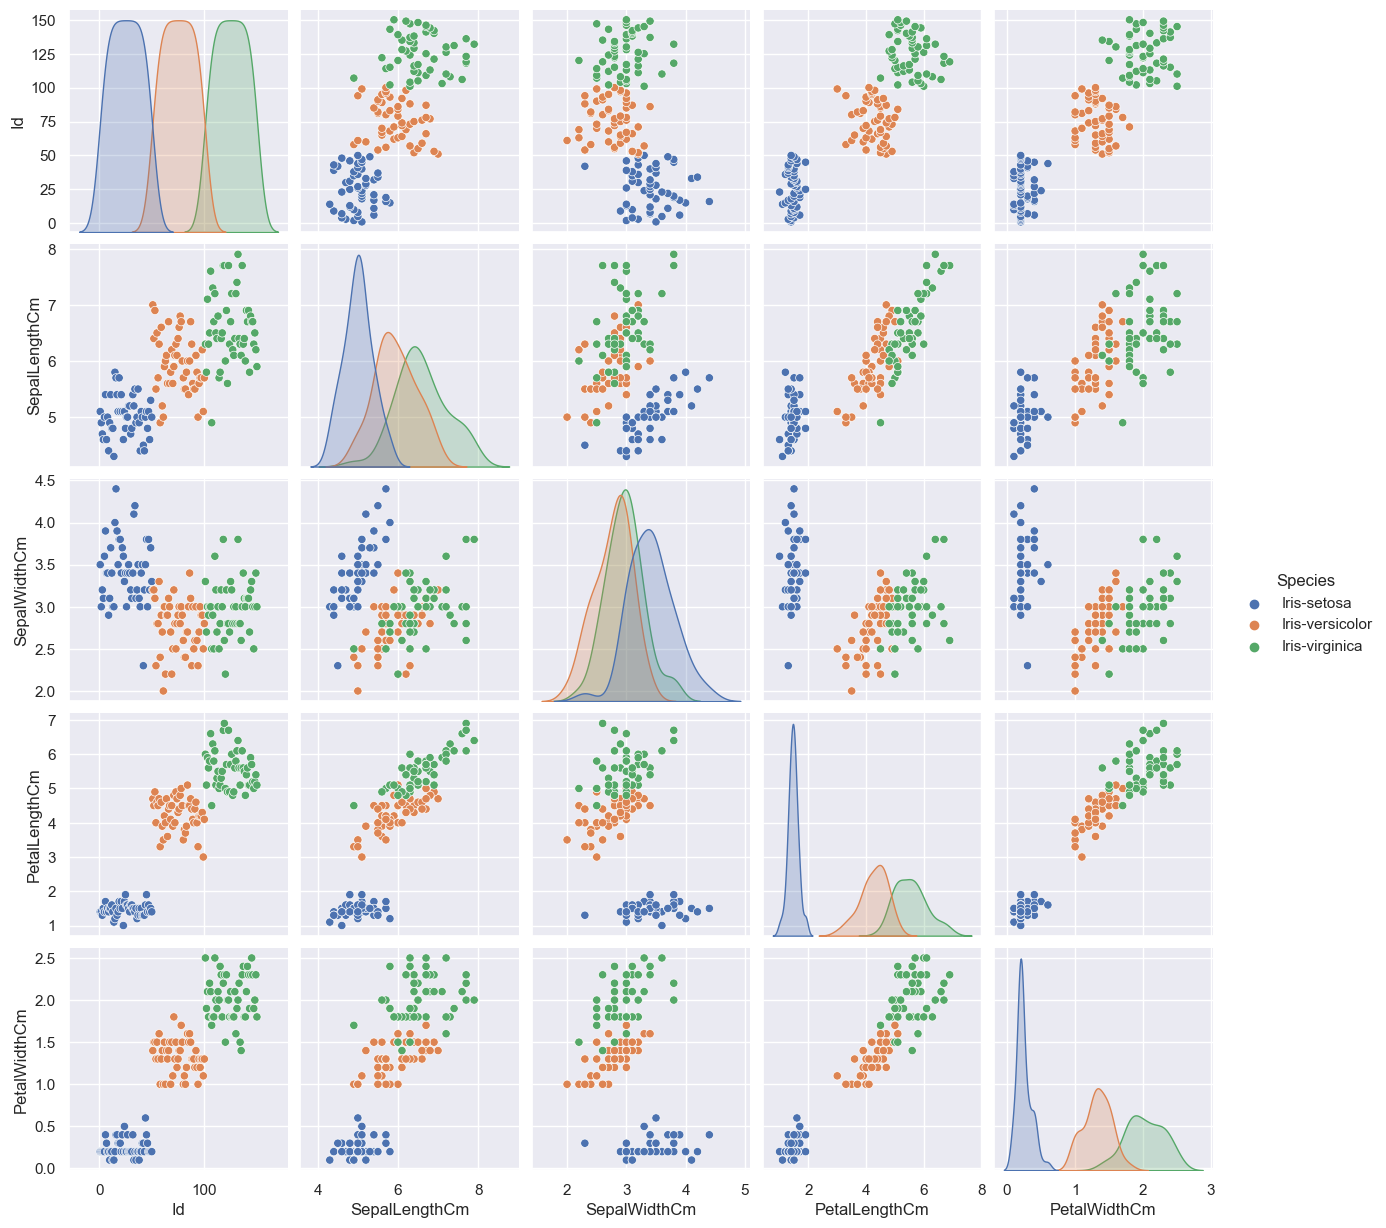

In [47]:
plt.figure(figsize=(5,5))
sns.pairplot(df,hue="Species")

<Axes: title={'center': 'Scatterplot of SepalLength and Sepalwidth'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

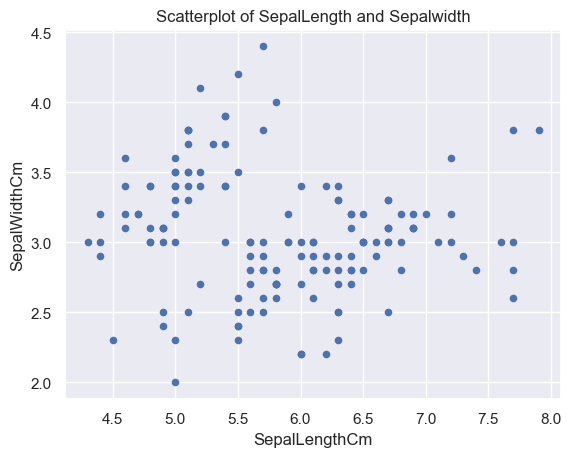

In [48]:
df.plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",title="Scatterplot of SepalLength and Sepalwidth")

<Axes: title={'center': 'Scatterplot of petal-length and petalwidth'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

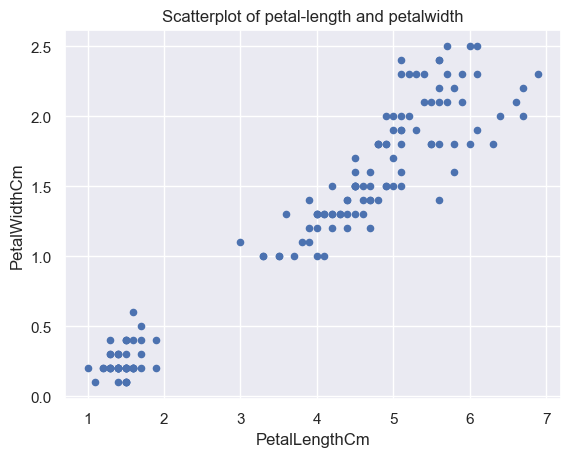

In [49]:
df.plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm",title="Scatterplot of petal-length and petalwidth")

d:\project\Codsoft\Iris classification\iris_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Specieswise Scatterplot between Sepal-length and sepalwidth')

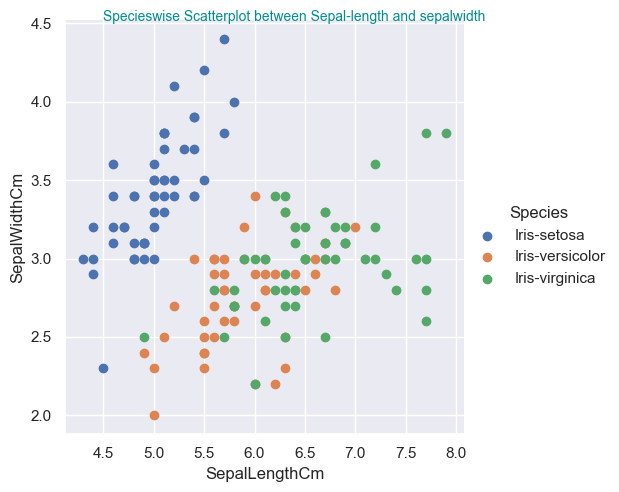

In [50]:

sns.FacetGrid(df,hue="Species",height=5)\
    .map(plt.scatter,"SepalLengthCm","SepalWidthCm")\
        .add_legend(title="Species")\
            .fig.suptitle("Specieswise Scatterplot between Sepal-length and sepalwidth",fontsize=10,color="#028e8d")

d:\project\Codsoft\Iris classification\iris_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Specieswise Scatterplot between Petal-length and Petalwidth')

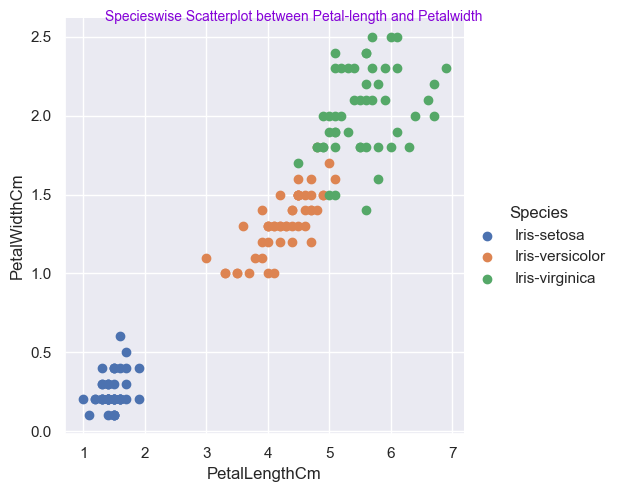

In [51]:
sns.FacetGrid(df,hue="Species",height=5)\
    .map(plt.scatter,"PetalLengthCm","PetalWidthCm")\
        .add_legend(title="Species")\
            .fig.suptitle("Specieswise Scatterplot between Petal-length and Petalwidth",fontsize=10,color="#8502d8")

In [52]:
#Removing  the unwanted columns
del df["Id"]
print(df)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


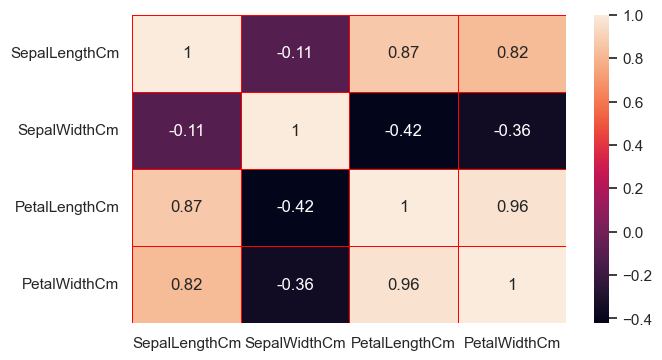

In [53]:
#Finding out the correlation between the numerical variables 
plt.figure(figsize=(7,4))
d= df.iloc[:, 0:4]
sns.heatmap(d.corr(),linecolor="red",linewidths=0.5,annot=True)
plt.show()


### We can see that there is a negetive correlation between sepal-length and sepal-width,petal-length an.d sepal-width,sepal width and petal-width.
---  
 ### In the Other hand Petal-length and petal-width are highly positively correlated.

## Model Building

In [54]:
y=df["Species"]
x=df.drop("Species",axis=1)


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


### K-Nearest Neighbour Classifier

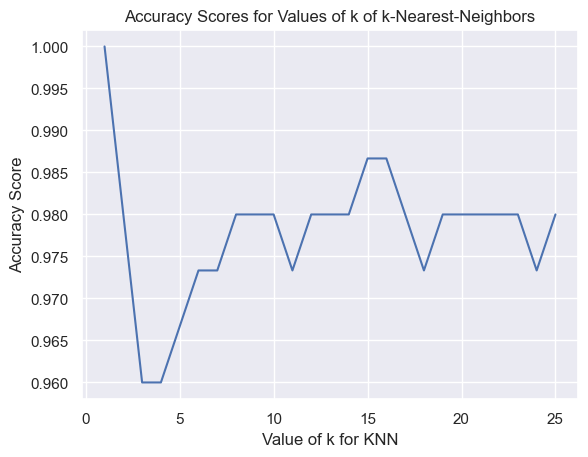

In [56]:
#Using training dataset as testing dataset
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

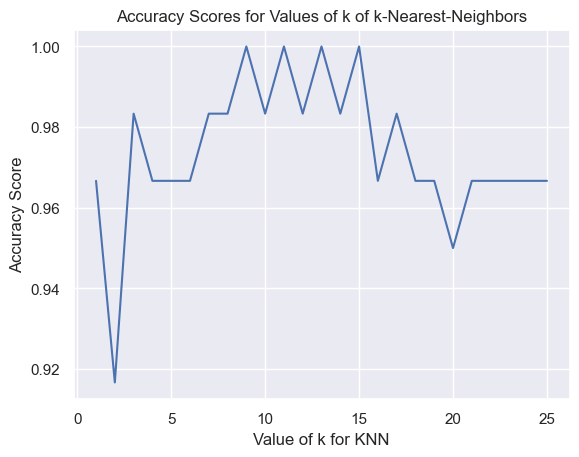

In [57]:
# For diffrent testing and training data
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [58]:
## We have choosen k=12 
knn = KNeighborsClassifier(n_neighbors=12, p=2, metric='minkowski')
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
knn_accuracy=accuracy_score(y_pred,y_test)
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(accuracy_score(y_pred, y_test)))

The accuracy of the knn classifier is 0.98 out of 1 on test data


### Logistic Regression

In [59]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr_accuracy=accuracy_score(y_pred,y_test)
print('The accuracy of the Logistic Regression is {:.2f} out of 1 on test data'.format(accuracy_score(y_pred, y_test)))

The accuracy of the Logistic Regression is 0.98 out of 1 on test data


### Decision Tree

In [60]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
dt_accuracy=accuracy_score(y_pred,y_test)
print('The accuracy of the Decisiontree Classifier is {:.2f} out of 1 on test data'.format(accuracy_score(y_pred, y_test)))

The accuracy of the Decisiontree Classifier is 0.97 out of 1 on test data


### Support Vector Classifier

In [61]:
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
svm_accuracy=accuracy_score(y_pred,y_test)
print('The accuracy of the Supportvector Classifier is {:.2f} out of 1 on test data'.format(accuracy_score(y_pred, y_test)))


The accuracy of the Supportvector Classifier is 0.98 out of 1 on test data


In [62]:
data=pd.DataFrame({"Model":["KNN Classifier","Logistic Regression","Decision Tree","Support Vector Machine"],
                  "Accuracy":[knn_accuracy,lr_accuracy,dt_accuracy,svm_accuracy]})
print(data.sort_values("Accuracy",ascending=False))


                    Model  Accuracy
0          KNN Classifier  0.983333
1     Logistic Regression  0.983333
3  Support Vector Machine  0.983333
2           Decision Tree  0.966667
